

#### Dataset
The data set contains various information about a Telecommunication company customers like age, region etc.The list of information is as follow. 

|Column Name	|Description and Specifics|
|:----|:--|
|Region	|Region code to the area where customers belong.|
|Tenure	|Their span of choosing the company.|
|Age	|Age of the customers.|
|Income	|Their average Salaries|
|Marital	|Their Martial Status|
|Address	|Address Zone|
|Ed	|Education Group|
|Employ	|Employment Years|
|Retire	|Retirement Status|
|Gender	|Their Gender|
|Reside	|Area Code where they live|
|Custcat	|Customer Category (Target Variable)|


# Preprocessing ``train.csv`` 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.
C:\Users\anmol\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anmol\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anmol\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anmol\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train=pd.read_csv("train(3).csv")
train.head()

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat
0,3.0,999,23,31.0,Married,Zone 1,3.0,1,No,Female,2.0,D
1,2.0,59,30,34.0,Single,Zone 2,NaN,2,No,Female,1.0,B
2,3.0,3,20,17.0,Married,Zone 1,2.0,0,No,Female,4.0,A
3,3.0,44,32,96.0,Married,Zone 1,4.0,5,No,Female,4.0,D
4,1.0,11,26,53.0,Single,Zone 2,3.0,3,No,Male,1.0,D


In [3]:
train.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address zone', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [4]:
train['custcat'].value_counts()

C    225
A    217
D    189
B    169
Name: custcat, dtype: int64

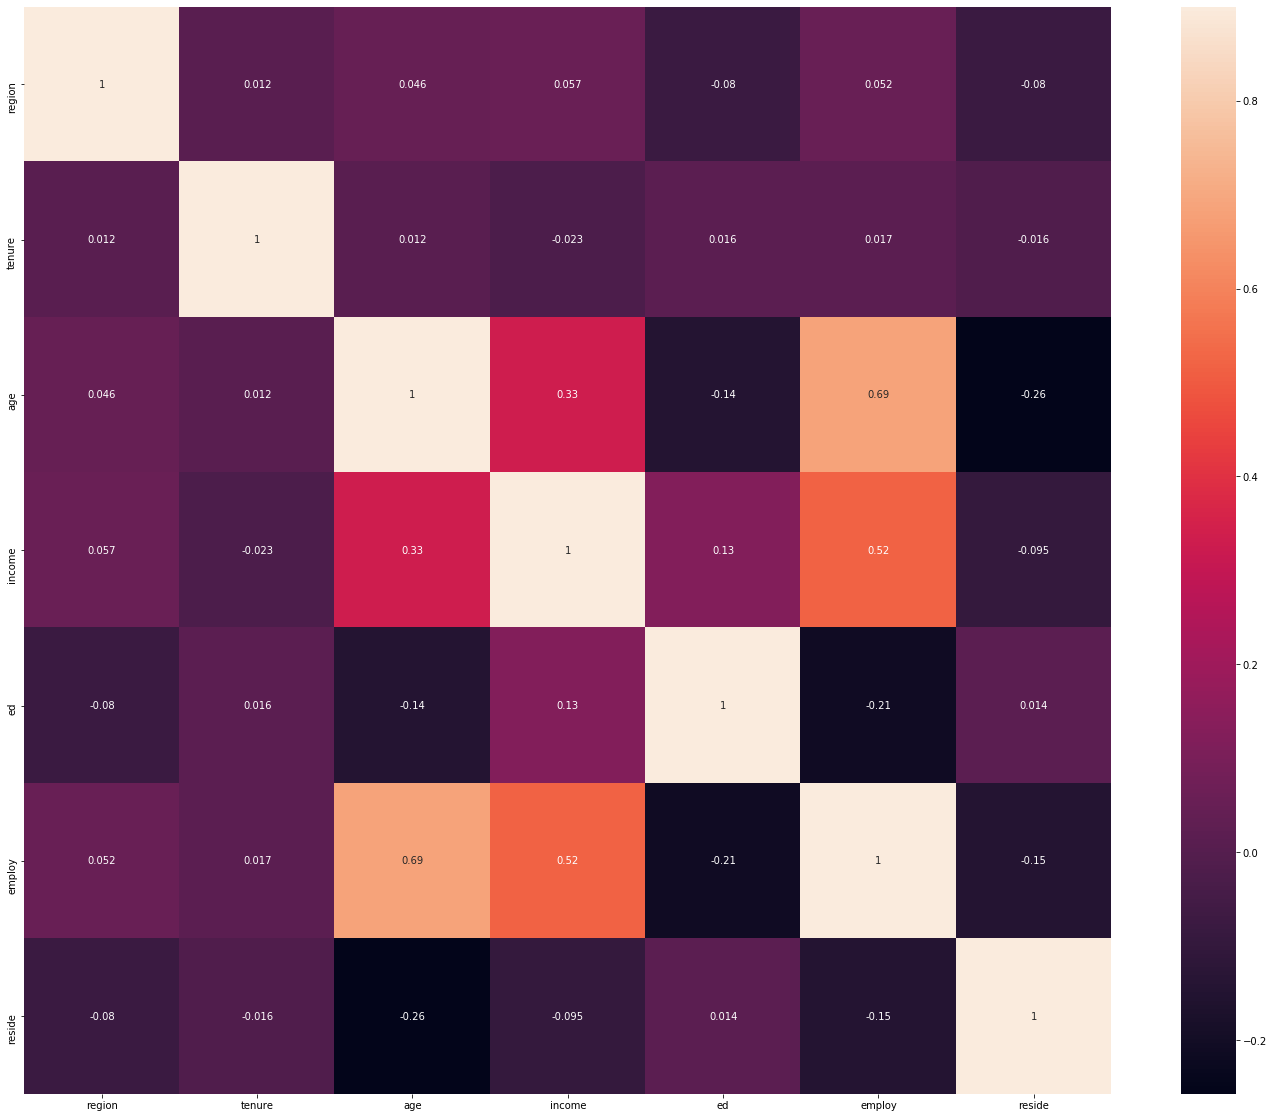

In [5]:
corr = train.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr, vmax=0.9,annot =True, square=True)

In [6]:
dict(train.isna().sum())

{'region': 26,
 'tenure': 0,
 'age': 0,
 'income': 16,
 'marital': 12,
 'address zone': 0,
 'ed': 19,
 'employ': 0,
 'retire': 0,
 'gender': 0,
 'reside': 26,
 'custcat': 0}

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        774 non-null    float64
 1   tenure        800 non-null    int64  
 2   age           800 non-null    int64  
 3   income        784 non-null    float64
 4   marital       788 non-null    object 
 5   address zone  800 non-null    object 
 6   ed            781 non-null    float64
 7   employ        800 non-null    int64  
 8   retire        800 non-null    object 
 9   gender        800 non-null    object 
 10  reside        774 non-null    float64
 11  custcat       800 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 75.1+ KB


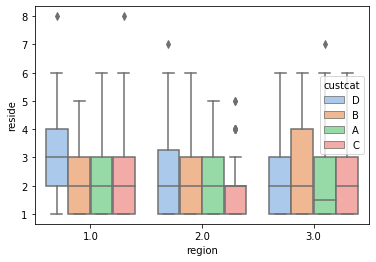

In [8]:
ax = sns.boxplot(x='region',y="reside",hue='custcat',palette = "pastel", data=train)

(array([ 22., 119., 209., 204., 122.,  59.,  32.,  10.,   5.,   2.]),
 array([2.19722458, 2.71944018, 3.24165578, 3.76387138, 4.28608698,
        4.80830258, 5.33051818, 5.85273378, 6.37494938, 6.89716498,
        7.41938058]),
 <a list of 10 Patch objects>)

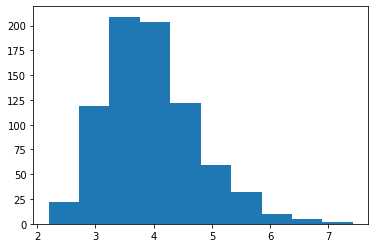

In [9]:
#Income =deal with null values only
plt.hist(np.log(train['income']))

In [10]:
train['address zone'].unique()

array(['Zone 1', 'Zone 2', 'Zone 7', 'Zone 11', 'Zone 33', 'Zone 4',
       'Zone 23', 'Zone 12', 'Zone 19', 'Zone 15', 'Zone 0', 'Zone 26',
       'Zone 39', 'Zone 5', 'Zone 22', 'Zone 20', 'Zone 8', 'Zone 3',
       'Zone 9', 'Zone 10', 'Zone 18', 'Zone 40', 'Zone 24', 'Zone 14',
       'Zone 17', 'Zone 6', 'Zone 31', 'Zone 13', 'Zone 34', 'Zone 27',
       'Zone 30', 'Zone 28', 'Zone 38', 'Zone 21', 'Zone 36', 'Zone 25',
       'Zone 29', 'Zone 41', 'Zone 55', 'Zone 43', 'Zone 16', 'Zone 42',
       'Zone 45', 'Zone 32', 'Zone 37', 'Zone 44', 'Zone 35', 'Zone 46'],
      dtype=object)

In [11]:
train = train.drop(columns=['address zone'])

In [12]:
train['region'] = train['region'].fillna(train['region'].median())

In [13]:
train['income'] = train['income'].fillna(train['income'].median())

In [14]:
train['marital']=train['marital'].replace('Unkown','Married')
train['marital']=train['marital'].map({'Married':1,'Single':0})
train['marital']=train['marital'].fillna(train['marital'].mode()[0])

In [15]:
train['ed'] = train['ed'].fillna(train['ed'].median())

In [16]:
train['reside'] = train['reside'].fillna(train['reside'].median())

In [17]:
train['tenure']=train['tenure'].replace(999,train['tenure'].median())

In [18]:
dict(train.isna().sum())

{'region': 0,
 'tenure': 0,
 'age': 0,
 'income': 0,
 'marital': 0,
 'ed': 0,
 'employ': 0,
 'retire': 0,
 'gender': 0,
 'reside': 0,
 'custcat': 0}

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   800 non-null    float64
 1   tenure   800 non-null    int64  
 2   age      800 non-null    int64  
 3   income   800 non-null    float64
 4   marital  800 non-null    float64
 5   ed       800 non-null    float64
 6   employ   800 non-null    int64  
 7   retire   800 non-null    object 
 8   gender   800 non-null    object 
 9   reside   800 non-null    float64
 10  custcat  800 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 68.9+ KB


In [20]:
train.head()

,region,tenure,age,income,marital,ed,employ,retire,gender,reside,custcat
0,3.0,36,23,31.0,1.0,3.0,1,No,Female,2.0,D
1,2.0,59,30,34.0,0.0,3.0,2,No,Female,1.0,B
2,3.0,3,20,17.0,1.0,2.0,0,No,Female,4.0,A
3,3.0,44,32,96.0,1.0,4.0,5,No,Female,4.0,D
4,1.0,11,26,53.0,0.0,3.0,3,No,Male,1.0,D


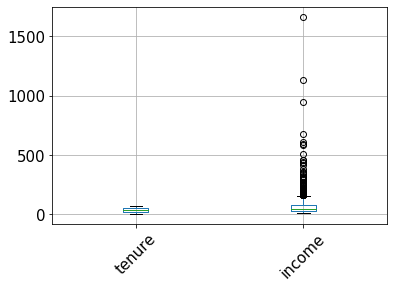

In [21]:
boxplot = train.boxplot(column=['tenure','income',], rot=45, fontsize=15)

In [22]:
### ENCODING
from sklearn.preprocessing import LabelEncoder
cols = ('retire','custcat','gender')
#label encoding
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))


In [23]:
reside=pd.get_dummies(train['reside'])
reside.columns=['reside1','reside2','reside3','reside4','reside5','reside6','reside7','reside8']
train=pd.concat([train,reside],axis=1)

In [24]:
region=pd.get_dummies(train['region'])
region.columns=['region1','region2','region3']
train=pd.concat([train,region],axis=1)

In [25]:
train=train.drop(['reside','region','reside1','region1','reside8'],axis=1)

In [26]:
train

,tenure,age,income,marital,ed,employ,retire,gender,custcat,reside2,reside3,reside4,reside5,reside6,reside7,region2,region3
0,36,23,31.0,1.0,3.0,1,0,0,3,1,0,0,0,0,0,0,1
1,59,30,34.0,0.0,3.0,2,0,0,1,0,0,0,0,0,0,1,0
2,3,20,17.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1
3,44,32,96.0,1.0,4.0,5,0,0,3,0,0,1,0,0,0,0,1
4,11,26,53.0,0.0,3.0,3,0,1,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,24,39,122.0,0.0,4.0,12,0,1,3,0,1,0,0,0,0,0,0
796,56,58,92.0,1.0,1.0,25,0,1,0,0,1,0,0,0,0,1,0
797,19,41,53.0,0.0,4.0,6,0,1,0,0,0,0,0,0,0,0,0
798,49,51,80.0,1.0,5.0,3,0,1,3,1,0,0,0,0,0,1,0


In [27]:
X = train.drop(['custcat'],axis=1)
y=train['custcat']

In [28]:
X

,tenure,age,income,marital,ed,employ,retire,gender,reside2,reside3,reside4,reside5,reside6,reside7,region2,region3
0,36,23,31.0,1.0,3.0,1,0,0,1,0,0,0,0,0,0,1
1,59,30,34.0,0.0,3.0,2,0,0,0,0,0,0,0,0,1,0
2,3,20,17.0,1.0,2.0,0,0,0,0,0,1,0,0,0,0,1
3,44,32,96.0,1.0,4.0,5,0,0,0,0,1,0,0,0,0,1
4,11,26,53.0,0.0,3.0,3,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,24,39,122.0,0.0,4.0,12,0,1,0,1,0,0,0,0,0,0
796,56,58,92.0,1.0,1.0,25,0,1,0,1,0,0,0,0,1,0
797,19,41,53.0,0.0,4.0,6,0,1,0,0,0,0,0,0,0,0
798,49,51,80.0,1.0,5.0,3,0,1,1,0,0,0,0,0,1,0


In [29]:
y

0      3
1      1
2      0
3      3
4      3
      ..
795    3
796    0
797    0
798    3
799    1
Name: custcat, Length: 800, dtype: int64

# Preprocessing ``test.csv``

In [30]:
test=pd.read_csv("test(3).csv")
test.head()

,Unnamed: 0,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside
0,985,3.0,24,30,25.0,Single,Zone 0,4.0,5,0,Male,2.0
1,426,1.0,999,57,94.0,Married,Zone 21,1.0,22,0,Male,2.0
2,44,1.0,64,43,76.0,Married,Zone 20,4.0,20,0,Female,4.0
3,616,3.0,5,47,46.0,Single,Zone 7,1.0,6,0,Female,1.0
4,673,3.0,9,25,27.0,Single,Zone 3,1.0,4,0,Female,1.0


In [31]:
dict(test.isna().sum())

{'Unnamed: 0': 0,
 'region': 5,
 'tenure': 0,
 'age': 0,
 'income': 8,
 'marital': 5,
 'address zone': 0,
 'ed': 4,
 'employ': 0,
 'retire': 0,
 'gender': 0,
 'reside': 5}

In [32]:
test=test.drop(columns=['Unnamed: 0'])

In [33]:
test['region'] = test['region'].fillna(test['region'].median())

In [34]:
test['income'] = test['income'].fillna(test['income'].median())

In [35]:
test['marital']=test['marital'].replace('Unkown','Married')
test['marital']=test['marital'].map({'Married':1,'Single':0})
test['marital']=test['marital'].fillna(test['marital'].mode()[0])

In [36]:
test['ed'] = test['ed'].fillna(test['ed'].median())

In [37]:
test['reside'] = test['reside'].fillna(test['reside'].median())

In [38]:
test['tenure']=test['tenure'].replace(999,test['tenure'].median())

In [39]:
dict(test.isna().sum())

{'region': 0,
 'tenure': 0,
 'age': 0,
 'income': 0,
 'marital': 0,
 'address zone': 0,
 'ed': 0,
 'employ': 0,
 'retire': 0,
 'gender': 0,
 'reside': 0}

In [40]:
test[test['employ'] == ' ']

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside
15,3.0,31,37,18.0,1.0,Zone 15,4.0,,0,Male,3.0
16,1.0,10,28,75.0,0.0,Zone 9,4.0,,0,Male,1.0
18,2.0,16,22,26.0,0.0,Zone 0,3.0,,0,Female,3.0


In [41]:
test['employ'] = test['employ'].replace(' ' , test['employ'].mode()[0])

In [42]:
test['employ']=test['employ'].astype(float)

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        200 non-null    float64
 1   tenure        200 non-null    int64  
 2   age           200 non-null    int64  
 3   income        200 non-null    float64
 4   marital       200 non-null    float64
 5   address zone  200 non-null    object 
 6   ed            200 non-null    float64
 7   employ        200 non-null    float64
 8   retire        200 non-null    int64  
 9   gender        200 non-null    object 
 10  reside        200 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 17.3+ KB


In [44]:
test['gender']=test['gender'].map({'Male':1,'Female':0})

In [45]:
reside=pd.get_dummies(test['reside'])
reside.columns=['reside1','reside2','reside3','reside4','reside5','reside6','reside7']
test=pd.concat([test,reside],axis=1)

In [46]:
region=pd.get_dummies(test['region'])
region.columns=['region1','region2','region3']
test=pd.concat([test,region],axis=1)

In [47]:
test=test.drop(['reside','region','reside1','region1','address zone'],axis=1)

In [48]:
X2 = test.loc[:,['tenure', 'age', 'income', 'marital', 'ed', 'employ', 'retire',
       'gender', 'reside2', 'reside3', 'reside4', 'reside5', 'reside6',
       'reside7', 'region2', 'region3']]


In [49]:
X2

,tenure,age,income,marital,ed,employ,retire,gender,reside2,reside3,reside4,reside5,reside6,reside7,region2,region3
0,24,30,25.0,0.0,4.0,5.0,0,1,1,0,0,0,0,0,0,1
1,37,57,94.0,1.0,1.0,22.0,0,1,1,0,0,0,0,0,0,0
2,64,43,76.0,1.0,4.0,20.0,0,0,0,0,1,0,0,0,0,0
3,5,47,46.0,0.0,1.0,6.0,0,0,0,0,0,0,0,0,0,1
4,9,25,27.0,0.0,1.0,4.0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,34,40,23.0,1.0,4.0,9.0,0,0,0,1,0,0,0,0,0,0
196,56,37,36.0,1.0,1.0,13.0,0,0,1,0,0,0,0,0,0,0
197,28,50,25.0,1.0,1.0,3.0,0,1,1,0,0,0,0,0,0,1
198,20,41,58.0,1.0,2.0,6.0,0,0,1,0,0,0,0,0,0,1


In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train2 = sc.fit_transform(X2)

# Machine learning models 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org) 

### KNN

Text(0, 0.5, 'MSE')

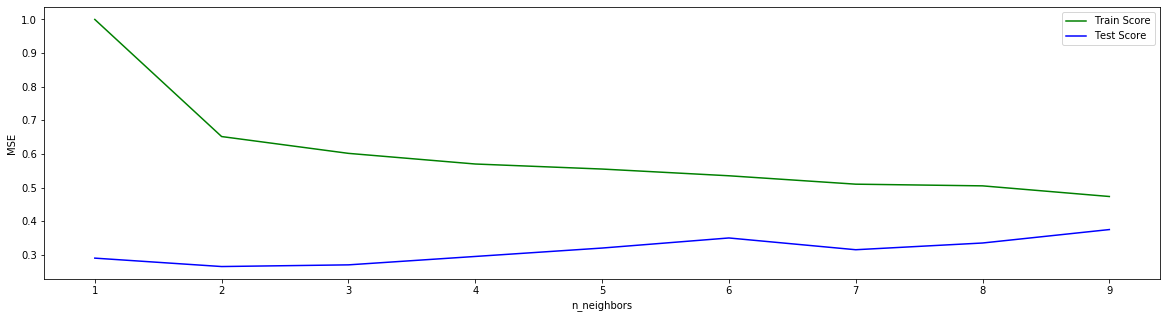

In [52]:
from sklearn.neighbors import KNeighborsClassifier
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    
x_axis = range(1,10)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')


In [53]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=3, n_jobs=-1,return_train_score=True)
model_knn.fit(X_train, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(X_test)
print(model_knn.score(X_test,y_test))

KNN: Best Parameters {'n_neighbors': 4}
0.295


In [54]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

1.0
0.29


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn, target_names=["A","B","C","D"]))

              precision    recall  f1-score   support

           A       0.33      0.47      0.39        60
           B       0.08      0.08      0.08        37
           C       0.40      0.38      0.39        56
           D       0.26      0.15      0.19        47

    accuracy                           0.29       200
   macro avg       0.27      0.27      0.26       200
weighted avg       0.29      0.29      0.28       200



### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
param = { 'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dtree = GridSearchCV(tree,param,cv=5, return_train_score=True)
dtree.fit(X_train,y_train)

print('Decision: Best Parameters',dtree.best_params_)


pred_dt = dtree.predict(X_test)
print(dtree.score(X_test,y_test))

Decision: Best Parameters {'max_depth': 2}
0.38


In [58]:
tree= DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred_tree=tree.predict(X_test)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.43666666666666665
0.42


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dt, target_names=["A","B","C","D"]))

              precision    recall  f1-score   support

           A       0.41      0.58      0.48        60
           B       0.21      0.14      0.16        37
           C       0.39      0.38      0.38        56
           D       0.41      0.32      0.36        47

    accuracy                           0.38       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.37      0.38      0.37       200



### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

In [61]:
from sklearn.model_selection import GridSearchCV
logit = LogisticRegression()
param = { 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}
logistic = GridSearchCV(logit,param,cv=5, return_train_score=True)
logistic.fit(X_train,y_train)

print('Logistic: Best Parameters',logistic.best_params_)


pred_log = logistic.predict(X_test)
print(logistic.score(X_test,y_test))

Logistic: Best Parameters {'C': 10, 'penalty': 'l2'}
0.37


In [62]:
log=LogisticRegression(C=1000, penalty='l2')
log.fit(X_train,y_train)
print(log.score(X_train,y_train))
print(log.score(X_test,y_test))

0.44166666666666665
0.37


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_log, target_names=["A","B","C","D"]))

              precision    recall  f1-score   support

           A       0.47      0.48      0.48        60
           B       0.21      0.19      0.20        37
           C       0.38      0.39      0.39        56
           D       0.34      0.34      0.34        47

    accuracy                           0.37       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.37      0.37      0.37       200



### Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
lr_clf = LogisticRegression(random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [65]:
from  sklearn.metrics import accuracy_score
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
y_pred_tree = lr_clf.predict(X_test)



Train score: 0.42
Test score: 0.38


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["A","B","C","D"]))

              precision    recall  f1-score   support

           A       0.42      0.48      0.45        60
           B       0.22      0.14      0.17        37
           C       0.37      0.45      0.40        56
           D       0.40      0.34      0.37        47

    accuracy                           0.38       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.38      0.37       200



### Adaboost Boosting

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
ada_clf = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.41
Test score: 0.37


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ada_clf.predict(X_test), target_names=["A","B","C","D"]))

              precision    recall  f1-score   support

           A       0.45      0.48      0.47        60
           B       0.15      0.11      0.13        37
           C       0.37      0.41      0.39        56
           D       0.38      0.38      0.38        47

    accuracy                           0.37       200
   macro avg       0.34      0.35      0.34       200
weighted avg       0.36      0.37      0.36       200



### Linear SVC 

In [70]:
from sklearn.svm import LinearSVC
linsvc = LinearSVC()
param = { 'C':[0.001,0.01,0.1,1,10,100,100]}
linear_svc= GridSearchCV(linsvc,param,cv=5, return_train_score=True)
linear_svc.fit(X_train,y_train)

print('LinearSCV: Best Parameters',linear_svc.best_params_)


pred_svc = linear_svc.predict(X_test)
print(linear_svc.score(X_test,y_test))

LinearSCV: Best Parameters {'C': 0.1}
0.375


In [71]:
svc=LinearSVC(C=0.1)
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.43833333333333335
0.375


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test), target_names=["A","B","C","D"]))

              precision    recall  f1-score   support

           A       0.47      0.50      0.48        60
           B       0.19      0.14      0.16        37
           C       0.35      0.39      0.37        56
           D       0.38      0.38      0.38        47

    accuracy                           0.38       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.38      0.37       200



# SVC with Kernel

In [73]:
KSVC_clf = svm.SVC(kernel='rbf', random_state=0)

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, cv=5, scoring= 'precision_macro', return_train_score=True, iid=False)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'C': 1, 'gamma': 0.1}


In [74]:
KSVC_clf = svm.SVC(kernel='rbf', C=1, gamma=10, probability=True)
KSVC_clf.fit(X_train, y_train)

y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

KSVC_train_precision_score = precision_score(y_train, y_pred_train, average='macro')
KSVC_test_precision_score = precision_score(y_test, y_pred_test, average='macro')

print('Train Precision score:', KSVC_train_precision_score)
print('Test Precision score:', KSVC_test_precision_score)
print(confusion_matrix(y_test, y_pred_test))

KSVC_clf = svm.SVC(kernel='rbf', C=10, gamma=0.1, probability=True)
KSVC_clf.fit(X_train, y_train)
train_score = cross_val_score(KSVC_clf, X_train, y_train)
test_score = cross_val_score(KSVC_clf, X_test, y_test)
print('Cross-validation scores:', train_score)
print('Cross-validation scores:', test_score)
print('Average Train score:', train_score.mean())
print('Average Test score:', test_score.mean())

y_pred = KSVC_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Train Precision score: 0.907001832672566
Test Precision score: 0.2902336028751123
[[16  5 31  8]
 [ 5  6 22  4]
 [12  5 32  7]
 [15  5 21  6]]
Cross-validation scores: [0.29166667 0.39166667 0.375      0.43333333 0.33333333]
Cross-validation scores: [0.4  0.35 0.45 0.3  0.45]
Average Train score: 0.365
Average Test score: 0.39
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        60
           1       0.25      0.22      0.23        37
           2       0.40      0.45      0.42        56
           3       0.46      0.36      0.40        47

    accuracy                           0.40       200
   macro avg       0.39      0.38      0.38       200
weighted avg       0.40      0.40      0.40       200



# Bagging with Decision Tree

In [75]:
dt_clf = DecisionTreeClassifier(max_depth=3)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
bag_clf.fit(X_train, y_train)
print('Train score:', bag_clf.score(X_train, y_train))
print('Test score:', bag_clf.score(X_test, y_test))

y_pred = bag_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy score: 0.415
Train score: 0.4666666666666667
Test score: 0.415
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        60
           1       0.26      0.14      0.18        37
           2       0.38      0.48      0.43        56
           3       0.48      0.53      0.51        47

    accuracy                           0.41       200
   macro avg       0.39      0.40      0.39       200
weighted avg       0.40      0.41      0.40       200



In [76]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:", gbrt.score(X_train, y_train))
print("Accuracy on test set:", gbrt.score(X_test, y_test))

y_pred = gbrt.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy on training set: 0.5083333333333333
Accuracy on test set: 0.425
              precision    recall  f1-score   support

           0       0.45      0.50      0.47        60
           1       0.44      0.22      0.29        37
           2       0.33      0.39      0.36        56
           3       0.51      0.53      0.52        47

    accuracy                           0.42       200
   macro avg       0.43      0.41      0.41       200
weighted avg       0.43      0.42      0.42       200



# Best model
Explain which machine learning model is the best model for this dataset and why? 

In [77]:
# After running different Machine Learning Models, Bagging with Decision Tree gave us the highest precision. 

In [78]:
final_test_pred=bag_clf.predict(X_train2)

In [79]:
final_test_pred=pd.Series(final_test_pred).replace({0:'A',1:'B',2:'C',3:'D'})

In [80]:
final_test_prediction=np.array(final_test_pred)

# Grading 
You should be able to correctly print the final prediction executing the following statement: 

In [81]:
final_test_prediction

array(['D', 'C', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'C', 'C', 'C', 'C',
       'D', 'A', 'D', 'D', 'C', 'A', 'C', 'C', 'C', 'A', 'D', 'C', 'C',
       'A', 'D', 'C', 'C', 'C', 'A', 'D', 'C', 'A', 'D', 'D', 'C', 'C',
       'C', 'C', 'A', 'B', 'A', 'A', 'C', 'A', 'A', 'C', 'D', 'C', 'D',
       'D', 'D', 'C', 'A', 'D', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'C',
       'A', 'D', 'D', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'D', 'A',
       'D', 'C', 'D', 'D', 'C', 'A', 'D', 'C', 'D', 'C', 'D', 'C', 'A',
       'C', 'C', 'C', 'C', 'A', 'C', 'A', 'D', 'D', 'A', 'A', 'C', 'C',
       'C', 'C', 'D', 'C', 'D', 'D', 'C', 'D', 'D', 'A', 'C', 'D', 'C',
       'C', 'D', 'C', 'C', 'C', 'C', 'A', 'A', 'D', 'C', 'D', 'D', 'A',
       'A', 'A', 'D', 'C', 'C', 'A', 'D', 'A', 'C', 'C', 'C', 'D', 'A',
       'C', 'D', 'D', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'D',
       'A', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'D',
       'C', 'D', 'D', 'D', 'C', 'C', 'C', 'A', 'C', 'C', 'A', 'C